In [57]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings


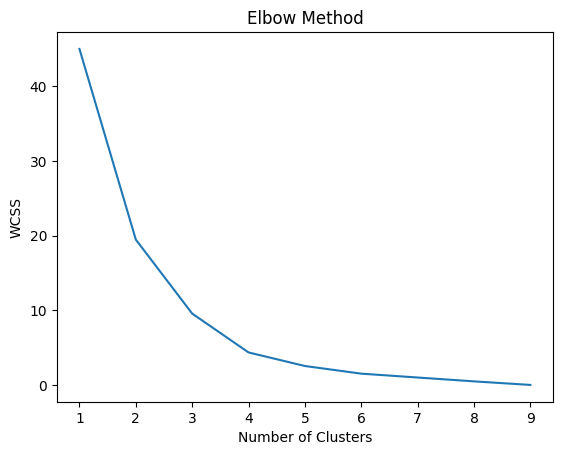

In [58]:
warnings.filterwarnings("ignore")


# Load the data into a pandas DataFrame
data = pd.DataFrame({
    'Age': [24, 35, 50, 42, 28, 38, 56, 33, 45],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Income': [40000, 60000, 80000, 70000, 45000, 90000, 12000, 55000, 65000],
    'Education': ['College', 'College', 'Graduate', 'Graduate', 'College', 'Graduate', 'Postgrad', 'College', 'Graduate'],
    'Total Spending': [500, 1000, 2000, 1500, 800, 2500, 3000, 1200, 1800],
    'Purchase Frequency': [10, 5, 2, 4, 8, 1, 1, 6, 3],
    'Items Purchased': [20, 10, 5, 12, 18, 3, 5, 15, 7]
})

# Separate the categorical and numerical features
categorical_features = ['Gender', 'Education']
numerical_features = ['Age', 'Income', 'Total Spending', 'Purchase Frequency', 'Items Purchased']

# One-hot encode the categorical features
encoder = OneHotEncoder()
encoded_categorical_features = encoder.fit_transform(data[categorical_features])

# Scale the numerical features
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(data[numerical_features])

# Combine the encoded categorical features and scaled numerical features
X = pd.concat([pd.DataFrame(encoded_categorical_features.toarray()), pd.DataFrame(scaled_numerical_features, columns=numerical_features)], axis=1)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_numerical_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [59]:
# Perform K-means clustering with K=3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(scaled_numerical_features)
data['Cluster'] = kmeans.labels_

# Examine the characteristics of each cluster
for i in range(3):
    print(f'Cluster {i}:')
    print(data[data['Cluster']==i].describe())

Cluster 0:
             Age        Income  Total Spending  Purchase Frequency  \
count   4.000000      4.000000        4.000000            4.000000   
mean   30.000000  50000.000000      875.000000            7.250000   
std     4.966555   9128.709292      298.607881            2.217356   
min    24.000000  40000.000000      500.000000            5.000000   
25%    27.000000  43750.000000      725.000000            5.750000   
50%    30.500000  50000.000000      900.000000            7.000000   
75%    33.500000  56250.000000     1050.000000            8.500000   
max    35.000000  60000.000000     1200.000000           10.000000   

       Items Purchased  Cluster  
count         4.000000      4.0  
mean         15.750000      0.0  
std           4.349329      0.0  
min          10.000000      0.0  
25%          13.750000      0.0  
50%          16.500000      0.0  
75%          18.500000      0.0  
max          20.000000      0.0  
Cluster 1:
             Age        Income  Total Spe

In [60]:

    
new_sample = pd.DataFrame({
    'Age': [30],
    'Gender': ['Male'],
    'Income': [50000],
    'Education': ['College'],
    'Total Spending': [1000],
    'Purchase Frequency': [6],
    'Items Purchased': [15]
})


# Preprocess the new sample
new_categorical_features = encoder.transform(new_sample[categorical_features])
new_numerical_features = scaler.transform(new_sample[numerical_features])
new_data = pd.concat([pd.DataFrame(new_categorical_features.toarray()), pd.DataFrame(new_numerical_features, columns=numerical_features)], axis=1)

# Predict the cluster label for the new sample
new_cluster_label = kmeans.predict(new_numerical_features)
print(f'The new sample belongs to Cluster {new_cluster_label[0]}')




The new sample belongs to Cluster 0


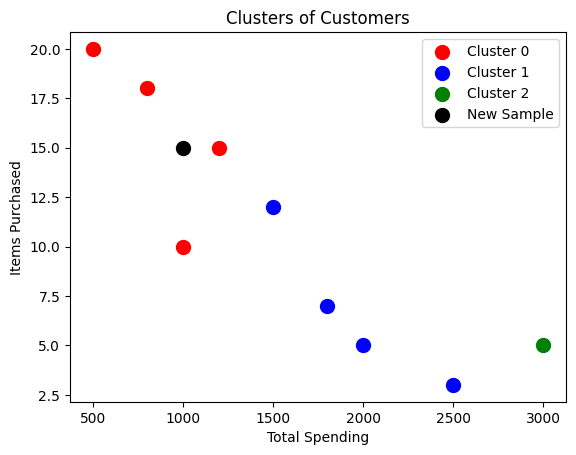

In [61]:
plt.scatter(data[data['Cluster'] == 0]['Total Spending'], data[data['Cluster'] == 0]['Items Purchased'], s=100, c='red', label='Cluster 0')
plt.scatter(data[data['Cluster'] == 1]['Total Spending'], data[data['Cluster'] == 1]['Items Purchased'], s=100, c='blue', label='Cluster 1')
plt.scatter(data[data['Cluster'] == 2]['Total Spending'], data[data['Cluster'] == 2]['Items Purchased'], s=100, c='green', label='Cluster 2')
plt.scatter(new_sample['Total Spending'], new_sample['Items Purchased'], s=100, c='black', label='New Sample')
plt.title('Clusters of Customers')
plt.xlabel('Total Spending')
plt.ylabel('Items Purchased')
plt.legend()
plt.show()